# **Pitch Prediction Data Science Project**
## Authors: Anshul Moondra, Cameron Courtney, Viren Velacheri




## **Introduction**
The data science problem we are trying to solve involves predicting pitches in baseball. We want to see whether or not we can predict the kind of pitch a given pitch is based on various pitching attributes.

Pitch classification is something in baseball that is needed instantly, as it is used in many data models that are ongoing throughout the game as well as for the fans as they show the pitch type on the scoreboard after each pitch. Pitchers often will also change their repertoire without telling anyone, so
allowing the system to detect it quickly is beneficial for batters to know throughout the game. The results of this predictive model can help baseball teams and their batters improve their game plans against pitchers.
 
The dataset we are using consists of over 22,527 records. A given record is representative of a single baseball pitch. Each record contains 16 different attributes that describe various aspects of the pitch. These attributes are listed below:

- **p_throws**: what hand the pitcher throws with
- **stand**: what side of the plate the batter was standing on
- **description**: the result of the pitch
- **release_speed**: the velocity of the pitch at release
- **release_spin_rate**: the spin rate of the pitch at release
- **spin_axis**: the axis on which the baseball spins
- **pfx_x**: horizontal movement of the pitch in feet
- **pfx_z**: the vertical movement of the pitch in feet
- **release_pos_x**: the horizontal release point of the pitch
- **release_pos_z**: the vertical release point of the pitch
- **release_extension**: how far in front of the plate the pitch was released
- **plate_x**: the horizontal location of the pitch
- **plate_z**: the vertical location of the pitch
- **pitch_name**: written out name of the pitch (Changeup, etc) (Class label or what we are trying to predict)
- **pitch_type**: the abreviation of the pitch_name
- **pitcher**: the unique ID number for a given pitcher

Pitch name is the class label that we are trying to predict for. We will use the other attributes as a datapoint to make this prediction. **The different possible values for the class labels are the following: 4 Seam Fastball, Slider, Cutter, Changeup, Sinker, Split-Finger, Knuckle Curve, and Curveball**. 

## **Google Colab Setup**
Below is what we used to set up our Google Colab space. It is commented out now, but this is what allowed all of us in the group to be able to work on and access the notebook at the same time. 

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd gdrive/MyDrive/DataMiningProjectCopy
# %ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/MyDrive/DataMiningProjectCopy'
/content/gdrive/.shortcut-targets-by-id/1mp2LsCYxml8kmIBdoUz4nNQUfeHEXPdw/DataMiningProjectCopy
 classification-dataset.csv       Data_Mining_Project.ipynb
 classification-dataset.gsheet    DataMiningProject.ipynb
'Copy of Project Proposal.gdoc'   finalized_model.sav


## **Data Cleaning, Data Exploration, and Feature Engineering**

## Reading and Quick Look at Dataset
After importing some of the basic libraries that we know for sure that we would need for analysis, we read in our dataset and took a quick glance at it to see what it look likes as a dataframe.

In [ ]:
# These import statements are needed for the various models we use.
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time
# Imports for basic data splitting, cross validation, scoring, dimensionality
# reduction, pipelines, and standardization.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# SMOTE Balancing Our Models
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import EditedNearestNeighbours
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
# Neural Network Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
# Support Vector Machine Classifier
from sklearn.svm import SVC
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Ensemble Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Upload Final Model
import pickle

data = pd.read_csv("classification-dataset.csv")
print(data.head())

   pitcher p_throws stand      description pitch_type pitch_name  \
0   453286        R     L  swinging_strike        NaN        NaN   
1   453286        R     R    hit_into_play        NaN        NaN   
2   453286        R     R             ball        NaN        NaN   
3   453286        R     R             ball        NaN        NaN   
4   453286        R     L    called_strike        NaN        NaN   

   release_speed  release_spin_rate  spin_axis  pfx_x  pfx_z  release_pos_x  \
0           94.9             2356.0      219.0  -0.78   1.30          -3.06   
1           94.5             2426.0      224.0  -0.84   1.17          -3.25   
2           96.6             2429.0      212.0  -0.35   1.34          -2.99   
3           95.1             2624.0      228.0  -0.81   1.23          -3.28   
4           95.3             2385.0      224.0  -0.78   1.44          -3.15   

   release_pos_z  release_extension  plate_x  plate_z  pitch_id  
0           5.75                6.0    -0.87     3

Based on the above above and after looking at background information regarding our dataset, we realized that the pitch_type and pitch_name were the same. The pitch_type is just the abbreviated form of pitch_name. Due to this, we proceeded to delete the pitch_type column from our dataframe.

In [ ]:
del data['pitch_type']
print(data.head())

   pitcher p_throws stand      description pitch_name  release_speed  \
0   453286        R     L  swinging_strike        NaN           94.9   
1   453286        R     R    hit_into_play        NaN           94.5   
2   453286        R     R             ball        NaN           96.6   
3   453286        R     R             ball        NaN           95.1   
4   453286        R     L    called_strike        NaN           95.3   

   release_spin_rate  spin_axis  pfx_x  pfx_z  release_pos_x  release_pos_z  \
0             2356.0      219.0  -0.78   1.30          -3.06           5.75   
1             2426.0      224.0  -0.84   1.17          -3.25           5.49   
2             2429.0      212.0  -0.35   1.34          -2.99           5.72   
3             2624.0      228.0  -0.81   1.23          -3.28           5.11   
4             2385.0      224.0  -0.78   1.44          -3.15           5.52   

   release_extension  plate_x  plate_z  pitch_id  
0                6.0    -0.87     3.24   

We then further explored the records to see how many N/A values our dataset contained. Due to the fact that only a small subset of records had N/A values (4,126) out of the total 22,526, we decided to just completely drop all records from the dataset that had at least one N/A value. Many of the N/A's came from the pitch_name of the pitch. Since this is the label we wanted to predict on, we felt that these records would not be helpful to us when it came time for model building. Similarly, for the other columns that had N/A's, we felt it would be unnecessary to perform methods such as imputation, as we still had more than enough data to properly carry out the construction of our models. Along with that, imputation doesn't really make sense for the spin rate and axis of a pitch, as those values might dramatically differ from pitch to pitch.

In [ ]:
print(data.shape)
print(data.isna().sum())
data = data.dropna()
print(data.isna().sum())
print(data.shape)

(22526, 16)
pitcher                 0
p_throws                0
stand                   0
description             0
pitch_name           4000
release_speed           0
release_spin_rate      42
spin_axis              42
pfx_x                   0
pfx_z                   0
release_pos_x           0
release_pos_z           0
release_extension      42
plate_x                 0
plate_z                 0
pitch_id                0
dtype: int64
pitcher              0
p_throws             0
stand                0
description          0
pitch_name           0
release_speed        0
release_spin_rate    0
spin_axis            0
pfx_x                0
pfx_z                0
release_pos_x        0
release_pos_z        0
release_extension    0
plate_x              0
plate_z              0
pitch_id             0
dtype: int64
(18493, 16)


Although most of our features are numeric variables, two of our variables, p_throws and stand, were categorical. Due to this, we performed one-hot encoding on them. In our encoding, both variables now store either 1 (representing 'R') or 0 (representing 'L').

In [ ]:
# One Hot Encoding of Categorical Variables
data['p_throws'].replace(['L', 'R'], [0,1], inplace = True)
data['stand'].replace(['L', 'R'], [0,1], inplace = True)

At the suggestion of Professor Beasley, we tried to keep the number of labels we wanted to predict relatively small (around 2 - 5 labels). With this in mind, we took a look at the possible pitch_labels to predict for and the respective counts for each of them. 

Initially, we hoped to find some groupings for each type of pitch label so that we could preserve our entire dataset. Based on background knowledge though, such groupings between these pitches didn't really exist. Because of this, we decided to just remove the labels that appeared the least in our dataset. Due to how very few records had the labels of **curveball**, **knuckle curve**, and **split-finger**, we decided to remove any records with these values.

The counts of each type of pitch label are listed below. The records we ended up removing all appeared less than 1,000 times in our dataset, which is relatively small considering that our dataset initially contained over 20,000 records.

Text(0.5, 0, 'Pitch Type')

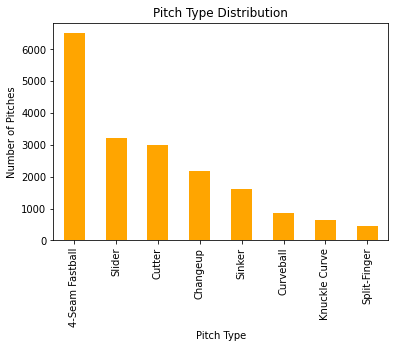

In [ ]:
data['pitch_name'].value_counts().plot(kind = 'bar', color = 'orange')
plt.title("Pitch Type Distribution")
plt.ylabel("Number of Pitches")
plt.xlabel("Pitch Type")

After removing the lowest three pitch labels from our data, these are the labels we have left. Our goal is to accurately be able to predict one of these 5 pitches. The pitches (and their counts) are listed below.

In [ ]:
values = ['Split-Finger', 'Knuckle Curve', 'Curveball']
data = data[data.pitch_name.isin(values) == False]

data['pitch_name'].value_counts()

4-Seam Fastball    6502
Slider             3228
Cutter             2989
Changeup           2187
Sinker             1613
Name: pitch_name, dtype: int64

## Feature Filtering
We examined the features and decided which ones to remove based on our domain knowledge, low variability, and high correlation.


### Domain Knowledge

Based on strictly our knowledge of this domain, the variables that we decided to remove and the reasons we did so are listed below:

**pitch_id and pitcher** – Both of these variables are identification information that are assigned to pitchers and the number of pitches a specific pitcher has thrown. They are not helpful in prediction as they are not relevant to the type of pitch.

**description** - The result of a play is normally not dependent on the type of pitch as different batters deal with pitches in different ways. Because of this, we feel this variable would not be relevant in predicting the type of pitch that was thrown.

**release_extension, release_pos_x, release_pos_z** – The release position should be roughly the same for each type of pitch, so there is little variablity present in these values. If a pitcher were deliberately changing their release points when throwing a specific pitch, they would be tipping off (giving away) the type of pitch they are throwing to the batter. This would not be smart which is why all of these values remain relatively similar for each pitch type.

***Note: In the variability section, we will verify that what we said above with regards to the variables release_extension, release_pos_x, and release_pos_z are in fact true***

###Variability

We first took a look at the categorical variables that we had one hot encoded earlier (pthrows and stand). We made histograms to get a quick glance at whether there was enough variability amongst the values. Based on the below histograms, it was apparent to us that there was in fact enough variability and no obvious skewing. 

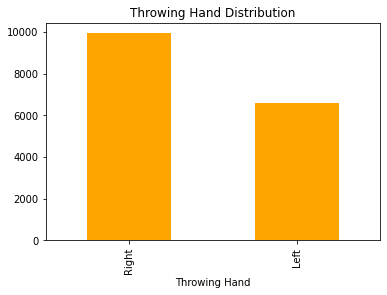

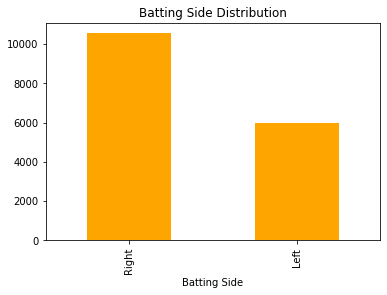

In [ ]:
pthrows_orig = data['p_throws'].replace([0, 1], ['Left','Right'], inplace = False)
pthrows_orig.value_counts().plot(kind = 'bar', color = 'orange')
plt.title("Throwing Hand Distribution")
plt.xlabel("Throwing Hand")
plt.show()


stand_orig = data['stand'].replace([0, 1], ['Left','Right'], inplace = False)
stand_orig.value_counts().plot(kind = 'bar', color = 'orange')
plt.title("Batting Side Distribution")
plt.xlabel("Batting Side")
plt.show()




We then took a look at the numeric variables. For these, we simply looked at their respective variance values.

In [ ]:
print("Release Speed Variability: " + str(data['release_speed'].var()))
print("Release Spin Rate: " + str(data['release_spin_rate'].var()))
print("Spin Axis: " + str(data['spin_axis'].var()))
print("Pfx_x: " + str(data['pfx_x'].var()))
print("Pfx_z: " + str(data['pfx_z'].var()))
print("Release Pos X: " + str(data['release_pos_x'].var()))
print("Release Pos Z: " + str(data['release_pos_z'].var()))
print("Release Extension: " + str(data['release_extension'].var()))
print("Plate X: " + str(data['plate_x'].var()))
print("Plate Z: " + str(data['plate_z'].var()))

Release Speed Variability: 22.941476948165803
Release Spin Rate: 124952.40838277544
Spin Axis: 2613.2326132601306
Pfx_x: 0.6307944099938104
Pfx_z: 0.3238680291098727
Release Pos X: 4.014829424431769
Release Pos Z: 0.23950163194248636
Release Extension: 0.06935857025611841
Plate X: 0.6673774465403014
Plate Z: 0.8960389026249447


As mentioned before, we believed that there would be little variability amongst the **release_extension, release_pos_x, and release_pos_z** variables. Indeed this was the case as seen from above. However, there were other variables that had low variability as well. These variables were **pfx_x, pfx_z, plate_x, and plate_z**. For the variables **plate_x and plate_z** we were skeptical even before this as we were on the fence on whether these features would be relevant or not. After seeing the above results, we decided to play around with the removal and addition of these features for models that were sensitive to irrelevant features such as K-Nearest Neighbor and SVM. For the variables **pfx_x and pfx_z** on the other hand, we felt the opposite as we had reason to believe that it does make a difference as far as the kind of pitch thrown. Due to this, we decided to examine the variables more closely with the use of boxplots.

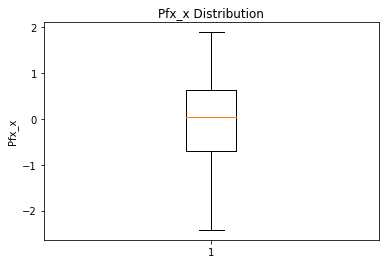

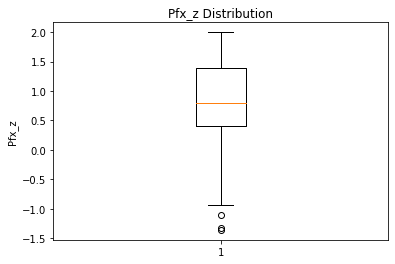

In [ ]:
plt.boxplot(data['pfx_x'])
plt.title("Pfx_x Distribution")
plt.ylabel("Pfx_x")
plt.show()

plt.boxplot(data['pfx_z'])
plt.title("Pfx_z Distribution")
plt.ylabel("Pfx_z")
plt.show()

As seen from above plots, it is apparent that the range of values for these respective variables is pretty small. Based on this, we feel like the variance values are actually pretty high considering the range displayed above. Due to this, we decided it was best to keep these features rather than remove them.

### Correlation

We examined the correlation values between all the columns. As seen below, it is evident that there isn't really any high correlation amongst any of the attributes. The only high correlations were between that of pfx_z and release_speed (r = 0.7) and p_throws and release_pos_x (r = -.92). In the sections below, these high correlations are accounted for. Other than these though, no features were removed or altered based on correlation.

In [ ]:
data.corr()

,pitcher,p_throws,stand,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,plate_x,plate_z,pitch_id
pitcher,1.000000,-0.238308,0.066568,0.133730,-0.283217,-0.175634,0.268299,0.168734,0.488674,0.431571,-0.092489,0.001360,0.069290,0.025653
p_throws,-0.238308,1.000000,-0.266280,0.172848,0.370252,0.245319,-0.448812,-0.150044,-0.926289,-0.377512,-0.134075,0.125281,0.038587,0.012723
stand,0.066568,-0.266280,1.000000,-0.042989,-0.049127,-0.207924,0.262913,0.026605,0.264665,0.120067,0.063111,0.147649,-0.070705,-0.009784
release_speed,0.133730,0.172848,-0.042989,1.000000,0.237348,0.379401,-0.360720,0.717333,-0.150657,-0.141455,0.348640,-0.033246,0.323141,0.048404
release_spin_rate,-0.283217,0.370252,-0.049127,0.237348,1.000000,-0.259015,0.044923,-0.141406,-0.329294,-0.333564,-0.020571,0.122162,0.065943,0.047460
spin_axis,-0.175634,0.245319,-0.207924,0.379401,-0.259015,1.000000,-0.802807,0.370402,-0.313282,-0.082769,0.086186,-0.209574,0.114017,-0.031260
pfx_x,0.268299,-0.448812,0.262913,-0.360720,0.044923,-0.802807,1.000000,-0.203264,0.481452,0.255377,-0.104648,0.275152,-0.076269,0.000455
pfx_z,0.168734,-0.150044,0.026605,0.717333,-0.141406,0.370402,-0.203264,1.000000,0.122595,0.262786,0.316208,-0.103621,0.363891,0.034885
release_pos_x,0.488674,-0.926289,0.264665,-0.150657,-0.329294,-0.313282,0.481452,0.122595,1.000000,0.472029,0.034220,-0.104701,-0.037110,-0.005530
release_pos_z,0.431571,-0.377512,0.120067,-0.141455,-0.333564,-0.082769,0.255377,0.262786,0.472029,1.000000,-0.187604,-0.116615,0.096348,-0.005682


## Outlier Detection

We will now look at whether outliers are present for each of the numeric variables. Based on what we see, we will decide which outliers to remove and which ones to keep

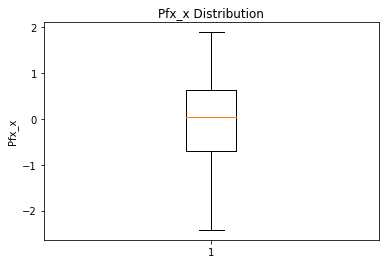

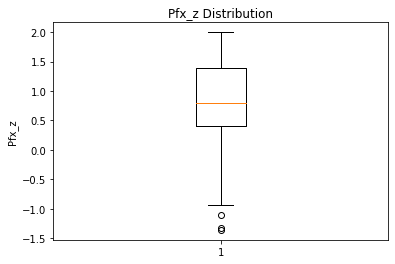

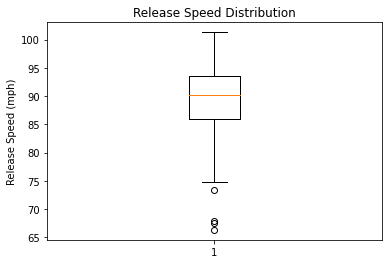

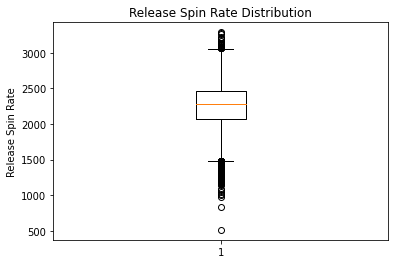

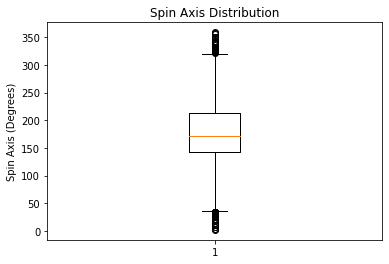

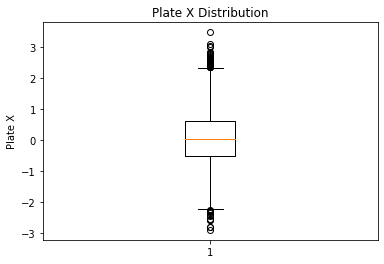

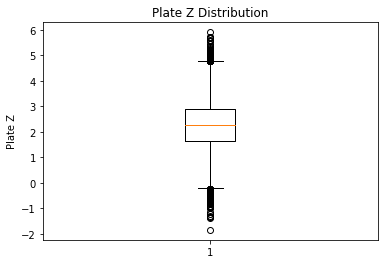

In [ ]:
# The boxplots for each numeric variable

plt.boxplot(data['pfx_x'])
plt.title("Pfx_x Distribution")
plt.ylabel("Pfx_x")
plt.show()

plt.boxplot(data['pfx_z'])
plt.title("Pfx_z Distribution")
plt.ylabel("Pfx_z")
plt.show()

plt.boxplot(data['release_speed'])
plt.title("Release Speed Distribution")
plt.ylabel("Release Speed (mph)")
plt.show()

plt.boxplot(data['release_spin_rate'])
plt.title("Release Spin Rate Distribution")
plt.ylabel("Release Spin Rate")
plt.show()


plt.boxplot(data['spin_axis'])
plt.title("Spin Axis Distribution")
plt.ylabel("Spin Axis (Degrees)")
plt.show()

plt.boxplot(data['plate_x'])
plt.title("Plate X Distribution")
plt.ylabel("Plate X")
plt.show()

plt.boxplot(data['plate_z'])
plt.title("Plate Z Distribution")
plt.ylabel("Plate Z")
plt.show()

After making the above boxplots, there were definitely some features that needed to be further investigated. One of the things we took a look at are the outliers in both the Pfx_z and Release Speed variables. Looking at the plots, the outliers seemed to sort of correspond to one another. To see if this was the case or not, we made a scatter plot between these variables.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


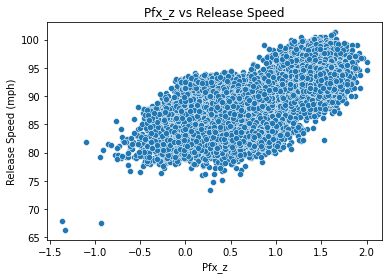

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


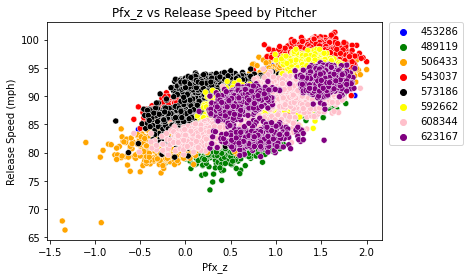

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


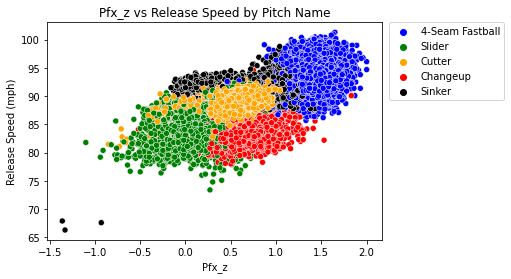

In [ ]:
import seaborn as sns

sns.scatterplot('pfx_z', 'release_speed',data=data)
plt.title("Pfx_z vs Release Speed")
plt.xlabel("Pfx_z")
plt.ylabel("Release Speed (mph)")
plt.show()

palette = ['blue', 'green', 'orange', 'red', 'black', 'yellow', 'pink', 'purple']
sns.scatterplot('pfx_z', 'release_speed',data=data,  hue="pitcher", palette=palette)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Pfx_z vs Release Speed by Pitcher")
plt.xlabel("Pfx_z")
plt.ylabel("Release Speed (mph)")
plt.show()

palette = ['blue', 'green', 'orange', 'red', 'black']
sns.scatterplot('pfx_z', 'release_speed',data=data,  hue="pitch_name", palette=palette)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Pfx_z vs Release Speed by Pitch Name")
plt.xlabel("Pfx_z")
plt.ylabel("Release Speed (mph)")
plt.show()


Our hunch appeared to be right as the main three outliers stood out. To further examine, we made two more scatterplots where the records were color-encoded based on pitcher and pitch name. Based on this it became apparent that the outliers are associated with one particular pitcher and it is classified as the same pitch as well. Based on background knowledge and looking at the last plot, it appears the pitches were probably misclassified as sinkers since they are so far from the other sinkers. Due to this, we will remove these outliers from the dataset entirely. 

For the other variables, we believe the outliers don't need to be removed. Our reasonings for this our listed below for each of the respective variables:

release_spin_rate: Since this data was from the 2021 MLB baseball season, outliers would be expected as their was controversy around the use of sticky substances all throughout season. It was commonly used by a lot of players and this really increased the spin rate. However, in 2021 they started to crack down on the use of these substances and hence there were dramatic declines in spin rate. This only took place midway through the season, hence why there is great variance and/or extremity in the values.

spin_axis: This is just the axis where the ball spins, so the range of values is just 0 to 360. Even though in the boxplots they appear as outliers, they are actually all reasonable since they are within this expected range.

plate_x and plate_z: Based on the many factors that go into a pitch, it is expected for the positioning of the pitches to vary widely. That's why there are lots and lots of outliers, but that is fine. There is no misclassification and is to be expected. Plus in later models like K_Nearest Neighbor and SVM we try removing these features entirely to see if it makes a difference in the predicting of the pitches. 

In [ ]:
# Removed based on Domain knowledge
del data['pitch_id']
del data['description']
del data['release_extension']
del data['release_pos_x']
del data['release_pos_z']
del data['pitcher']

# Altered based on outlier detection
data = data[data['release_speed'] > 70]



In [ ]:
# What data looks like now after changes made
print(data.head())

      p_throws  stand       pitch_name  release_speed  release_spin_rate  \
4000         1      1  4-Seam Fastball           94.3             2486.0   
4001         1      1           Slider           84.7             2365.0   
4003         1      1           Slider           85.0             2442.0   
4004         1      1           Slider           85.5             2331.0   
4005         1      1           Slider           84.2             2343.0   

      spin_axis  pfx_x  pfx_z  plate_x  plate_z  
4000      230.0  -1.22   1.44    -0.37     3.24  
4001      173.0  -0.16   0.39    -0.78     1.42  
4003      155.0   0.22   0.21     1.32     1.29  
4004      215.0   0.04   0.37     1.02     1.35  
4005      175.0   0.05   0.34    -0.02     2.13  


**Note: As mentioned before, variables plate_x and plate_z are ones that we will experiment with in terms of leaving in or out for models that are sensitive to irrelevant features like K-Nearest Neighbor and SVM.**

In order to begin building classification models, we separate our dataset into two separate dataframes. One dataframe will contain all of the features of a pitch, while the other dataframe will hold the correct label for that pitch. These dataframes will be used to help build and evaluate our classification models.

In [ ]:
data_labels = data['pitch_name'].to_frame()
data_features = data.drop(['pitch_name'], axis=1)
print(data_labels.head())
print(data_features.head())

           pitch_name
4000  4-Seam Fastball
4001           Slider
4003           Slider
4004           Slider
4005           Slider
      p_throws  stand  release_speed  release_spin_rate  spin_axis  pfx_x  \
4000         1      1           94.3             2486.0      230.0  -1.22   
4001         1      1           84.7             2365.0      173.0  -0.16   
4003         1      1           85.0             2442.0      155.0   0.22   
4004         1      1           85.5             2331.0      215.0   0.04   
4005         1      1           84.2             2343.0      175.0   0.05   

      pfx_z  plate_x  plate_z  
4000   1.44    -0.37     3.24  
4001   0.39    -0.78     1.42  
4003   0.21     1.32     1.29  
4004   0.37     1.02     1.35  
4005   0.34    -0.02     2.13  


## **Modeling**
In the below sections, we build a number of different models in the hopes of finding the one that best predicts the pitch label of a given pitch. When evaluating each model, the main evaluator we looked to use when looking at our models was accuracy. 

In some of the models, we do provide output that displays other evaluation metrics, such as precision and recall. In the context of baseball though, we felt that these evaluators were not as nearly as important as accuracy, as we don't really have a preference of predicting one specific type of pitch label over another. Along with that, when considering our dataset, we felt that our classes were fairly balanced, thus negating the need to look at precision and recall. Although there technically is an imbalance in our classes, we felt that it was not significant (as discussed in the below cell) enough to prefer precision and recall over accuracy.

## Class Imbalance Problem
In the bar graph listed earlier in the notebook, it can be seen that we have a slight imbalance beween classes in our data. The majority pitch label, Fastball, occurs 6,502 times in our dataset, while other pitch labels occur somewhere between 3,300 and 1,600 times. We feel that, although a disparity exists between label types, the different counts are not large enough to significantly alter our modeling techniques. Thus, for every model, we create a model in which our original dataset is used.

For the sake of completeness though, we do make use of SMOTE (Synthetic Minority Oversampling Technique) to artifically create a dataset in which all label counts are equal. Along with a model built around our original dataset, we build a model with the dataset created by SMOTE. This process is illustrated below.

In [ ]:
smote = SMOTE(random_state = 0, sampling_strategy = 'not majority')
print("Data Counts Before SMOTE:")
print(data_labels.value_counts())
print()
x_smote, y_smote = smote.fit_resample(data_features, data_labels)
print("Data Counts After SMOTE")
print(y_smote.value_counts())

Data Counts Before SMOTE:
pitch_name     
4-Seam Fastball    6502
Slider             3228
Cutter             2989
Changeup           2187
Sinker             1610
dtype: int64

Data Counts After SMOTE
pitch_name     
4-Seam Fastball    6502
Changeup           6502
Cutter             6502
Sinker             6502
Slider             6502
dtype: int64


## Decision Tree Model
The first model we tried was the Decision Tree model. We felt the use of a Decision Tree was appropriate because it is a simple classifier that are easy to build and interpret. The accuracy of Decision Trees are also not really affected by irrelevant attributes, so we thought that, even if our data still contained irrelevant features, we would still be getting an accurate classifier. In order to build our Decision Tree, we made use of nested cross-validation, using max_depth, min_samples_leaf, and max_features as our hyperparameters to tune. 

The first Decision Tree Model listed is the one created using our entire dataset. In this model, we achieved a fairly high accuracy score of 90.97%. In the cross-validation loop, we tuned the hyperparameters of max_depth, min_samples_leaf, max_features, and the split criterion. Along with accuracy, we display the precision, recall, and f1-score of the model. Even though are data might be considered unbalanced, these scores still appear to be fairly decent.

In [ ]:
clf = DecisionTreeClassifier()
param_grid = {"max_depth": [5,10,15,20, 25], "min_samples_leaf": [5,10,15,20], "max_features": [4,6,8], "criterion": ['entropy', 'gini']}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
predict_y = cross_val_predict(grid_search, data_features, data_labels, cv = 10)
print("Accuracy:", accuracy_score(data_labels, predict_y) * 100)
print()
print(confusion_matrix(data_labels, predict_y))
print(classification_report(data_labels, predict_y))

Accuracy: 90.96633567449746

[[6294   53   33   98   24]
 [  40 2116    1   23    7]
 [  17    4 2570   33  365]
 [ 157   29   16 1397   11]
 [  11   51  510    9 2647]]
                 precision    recall  f1-score   support

4-Seam Fastball       0.97      0.97      0.97      6502
       Changeup       0.94      0.97      0.95      2187
         Cutter       0.82      0.86      0.84      2989
         Sinker       0.90      0.87      0.88      1610
         Slider       0.87      0.82      0.84      3228

       accuracy                           0.91     16516
      macro avg       0.90      0.90      0.90     16516
   weighted avg       0.91      0.91      0.91     16516



The Decison Tree Model made using our SMOTE dataset is listed below. This model achieved an accuracy score of 89.08%, which is slightly worse than our model without having to use SMOTE. Based on this output, it appears that our assumptions that our model was fairly balanced was (somewhat) true. 

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
smote = SMOTE(random_state = 0, sampling_strategy = 'not majority')
clf = DecisionTreeClassifier()
pipe = imbpipeline(steps = [('smote', smote), ('clf', DecisionTreeClassifier())])
param_grid = {"clf__max_depth": [5,10,15,20, 25], "clf__min_samples_leaf": [5,10,15,20], "clf__max_features": [4,6,8], "clf__criterion": ['entropy', 'gini']}
grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, cv=5, scoring='accuracy')
predict_y = cross_val_predict(grid_search, data_features, data_labels, cv = 10)
print("Accuracy:", accuracy_score(data_labels, predict_y) * 100)
print()
print(confusion_matrix(data_labels, predict_y))
print(classification_report(data_labels, predict_y))

Accuracy: 89.083313150884

[[6045   45   94  300   18]
 [  37 2106    4   24   16]
 [  35    4 2559   40  351]
 [  96   33   18 1456    7]
 [   8   35  632    6 2547]]
                 precision    recall  f1-score   support

4-Seam Fastball       0.97      0.93      0.95      6502
       Changeup       0.95      0.96      0.96      2187
         Cutter       0.77      0.86      0.81      2989
         Sinker       0.80      0.90      0.85      1610
         Slider       0.87      0.79      0.83      3228

       accuracy                           0.89     16516
      macro avg       0.87      0.89      0.88     16516
   weighted avg       0.90      0.89      0.89     16516



## Naive Bayes Classifier
The second model tried was a Naive Bayes Classifier. We once again made use of nested cross-validation and got a much lower accuracy score of 76.32%. This realtively poor accuracy score could possibly be explained by the fact that some of the attributes of the data are not independent of one another. A Naive Bayes Classifier operates under the assumption that all input features are statistically independent of one another. We don't believe that this is the case in this dataset, as well certian fetures, such as pfx_z and spin-rate, are not independent of one another. Because of this, when coupled with the relatively low accuracy score, we don't believe this is a suitable model for our dataset.

In [ ]:
clf = GaussianNB()
nested_score = cross_val_score(clf, data_features, data_labels.values.ravel(), cv = 10)
print("Accuracy:", nested_score.mean()*100)
predict_y = cross_val_predict(clf, data_features, data_labels.values.ravel(), cv = 10)
print()
print(classification_report(data_labels, predict_y))

Accuracy: 76.32498757081703

                 precision    recall  f1-score   support

4-Seam Fastball       0.95      0.98      0.96      6502
       Changeup       0.79      0.88      0.83      2187
         Cutter       0.53      0.57      0.55      2989
         Sinker       0.69      0.66      0.68      1610
         Slider       0.59      0.49      0.53      3228

       accuracy                           0.76     16516
      macro avg       0.71      0.71      0.71     16516
   weighted avg       0.76      0.76      0.76     16516



For Naive Bayes, the with SMOTE performs slightly worse than the model that contains all of the data. The SMOTE model achieves an accuracy score of 74.92%. As stated above though, Naive Bayes probably isn't the best way to model our data, so we will not be using either of these models.

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
smote = SMOTE(random_state=0, sampling_strategy='not majority')
clf = GaussianNB()
pipe = imbpipeline(steps = [("smote", smote), ("clf", clf)])
nested_score = cross_val_score(pipe, data_features, data_labels.values.ravel(), cv = 10)
print("Accuracy:", nested_score.mean()*100)
predict_y = cross_val_predict(pipe, data_features, data_labels.values.ravel(), cv = 10)
print()
print(classification_report(data_labels, predict_y))

Accuracy: 74.91993992928198

                 precision    recall  f1-score   support

4-Seam Fastball       0.96      0.96      0.96      6502
       Changeup       0.78      0.87      0.83      2187
         Cutter       0.51      0.51      0.51      2989
         Sinker       0.57      0.69      0.63      1610
         Slider       0.60      0.50      0.55      3228

       accuracy                           0.75     16516
      macro avg       0.69      0.71      0.69     16516
   weighted avg       0.75      0.75      0.75     16516



## K-Nearest Neighbor Model
In this cell, we make use of a K-Nearest Neighbor Model. We felt that this classification model could be applicable to our data because we thought that pitches that share the same label would share similar features, and thus be "close" to one another. In order to build this model, we made scaled all of our data and made use of nested cross-validation, tweaking the hyperparameter of neighborhood size. Along with that, since this model tends to suffer from the curse of dimensionality, we also made use of PCA Dimensionality Reduction as a hyperparameter.

This model performed fairly well, achieving an accuracy score of 87.34%. This score is superior to that of the Naive Bayes Classifier, but is slightly less than that of our Decision Tree Classifier. One possible explanation for this is that, even after feature engineering our dataset still might contain some irrelevant features. The accuracy of K-Nearest Neighbor models tend to suffer when irrelevant features are present, while the accuracy of a Decision Tree does not. It could also just be the case that a Deicison Tree models our data better than K-Nearest Neighbors does.

In [ ]:
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1
PCA = PCA()
knn = KNeighborsClassifier()
pipe = Pipeline(steps = [('scaler', scaler), ('PCA', PCA), ('knn', knn)])

param_grid = {
    'PCA__n_components': list(range(1, 10)),
    'knn__n_neighbors': list(range(1, 26))
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(data_features, data_labels.values.ravel())
nested_score = cross_val_score(grid_search, data_features, data_labels.values.ravel(), cv=5)
print("Accuracy:", nested_score.mean()*100)

Accuracy: 87.34003096458648


Similiar to our other models, we ran K-Nearest Neighbors while making use of SMOTE to balance out our data. The SMOTE Model achieved an accuracy score of 87.32%, which is basically the same as the non-SMOTE model. 

In [ ]:
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline as imbpipeline
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1
smote = SMOTE(random_state=0, sampling_strategy='not majority')
knn = KNeighborsClassifier()
enn = EditedNearestNeighbours()
PCA = PCA()
pipe = imbpipeline(steps = [('scaler', scaler), ('PCA', PCA), ('enn', enn), ('smote', smote), ('knn', knn)])

param_grid = {
    'PCA__n_components': list(range(1, 10)),
    'knn__n_neighbors': list(range(1, 26))
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
nested_score = cross_val_score(grid_search, data_features, data_labels.values.ravel(), cv=5)
print("Accuracy:", nested_score.mean()*100)

Accuracy: 87.32193530131461


We understand that K-Nearest Neighbors is sensitive to irrelevant features, so we decided to play around with 3 different variance thresholds (1, 0.75, 0.5) to try to eliminate possible irrelevant features.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

sel = VarianceThreshold(threshold=(1))
transformed_features = sel.fit_transform(data_features)
number_of_features = len(transformed_features[0])
print("Number of Features: " + str(number_of_features))
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1
PCA = PCA()
knn = KNeighborsClassifier()
pipe = Pipeline(steps = [('sel', sel), ('scaler', scaler), ('PCA', PCA), ('knn', knn)])

param_grid = {
    'PCA__n_components': list(range(1, number_of_features + 1)),
    'knn__n_neighbors': list(range(1, 26)),
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(data_features, data_labels.values.ravel())
nested_score = cross_val_score(grid_search, data_features, data_labels.values.ravel(), cv=5)
print("Accuracy:", nested_score.mean()*100)

Number of Features: 3
Accuracy: 71.11923711586576


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

sel = VarianceThreshold(threshold=(0.75))
transformed_features = sel.fit_transform(data_features)
number_of_features = len(transformed_features[0])
print("Number of Features: " + str(number_of_features))
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1
PCA = PCA()
knn = KNeighborsClassifier()
pipe = Pipeline(steps = [('sel', sel), ('scaler', scaler), ('PCA', PCA), ('knn', knn)])

param_grid = {
    'PCA__n_components': list(range(1, number_of_features + 1)),
    'knn__n_neighbors': list(range(1, 26))
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(data_features, data_labels.values.ravel())
nested_score = cross_val_score(grid_search, data_features, data_labels.values.ravel(), cv=5)
print("Accuracy:", nested_score.mean()*100)

Number of Features: 4
Accuracy: 70.55001176566317


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

sel = VarianceThreshold(threshold=(0.5))
transformed_features = sel.fit_transform(data_features)
number_of_features = len(transformed_features[0])
print("Number of Features: " + str(number_of_features))
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1
PCA = PCA()
knn = KNeighborsClassifier()
pipe = Pipeline(steps = [('sel', sel), ('scaler', scaler), ('PCA', PCA), ('knn', knn)])

param_grid = {
    'PCA__n_components': list(range(1, number_of_features + 1)),
    'knn__n_neighbors': list(range(1, 26))
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(data_features, data_labels.values.ravel())
nested_score = cross_val_score(grid_search, data_features, data_labels.values.ravel(), cv=5)
print("Accuracy:", nested_score.mean()*100)

Number of Features: 6
Accuracy: 77.65251561607724


Based on the above results, it is apparent that low variance filtering led to significantly worse results. Due to this, we believe all our features are relevant with regards to variance.

As mentioned before, we played around with the removal of the plate_x, plate_z, and spin_axis variables. This can be seen in the following below cells.

In [ ]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1
PCA = PCA()
data_features2 = data_features.drop(['plate_x', 'plate_z'], axis=1)
print(data_features2.head())
knn = KNeighborsClassifier()
pipe = Pipeline(steps = [('scaler', scaler), ('PCA', PCA), ('knn', knn)])

param_grid = {
    'PCA__n_components': list(range(1, 8)),
    'knn__n_neighbors': list(range(1, 26))
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(data_features2, data_labels.values.ravel())
nested_score = cross_val_score(grid_search, data_features2, data_labels.values.ravel(), cv=5)
print("Accuracy:", nested_score.mean()*100)

      p_throws  stand  release_speed  release_spin_rate  spin_axis  pfx_x  \
4000         1      1           94.3             2486.0      230.0  -1.22   
4001         1      1           84.7             2365.0      173.0  -0.16   
4003         1      1           85.0             2442.0      155.0   0.22   
4004         1      1           85.5             2331.0      215.0   0.04   
4005         1      1           84.2             2343.0      175.0   0.05   

      pfx_z  
4000   1.44  
4001   0.39  
4003   0.21  
4004   0.37  
4005   0.34  
Accuracy: 89.72573909257046


In [ ]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1
PCA = PCA()
data_features3 = data_features.drop(['plate_x', 'plate_z', 'spin_axis'], axis=1)
print(data_features3.head())
knn = KNeighborsClassifier()
pipe = Pipeline(steps = [('scaler', scaler), ('PCA', PCA), ('knn', knn)])

param_grid = {
    'PCA__n_components': list(range(1, 7)),
    'knn__n_neighbors': list(range(1, 26))
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(data_features3, data_labels.values.ravel())
nested_score = cross_val_score(grid_search, data_features3, data_labels.values.ravel(), cv=5)
print("Accuracy:", nested_score.mean()*100)

      p_throws  stand  release_speed  release_spin_rate  pfx_x  pfx_z
4000         1      1           94.3             2486.0  -1.22   1.44
4001         1      1           84.7             2365.0  -0.16   0.39
4003         1      1           85.0             2442.0   0.22   0.21
4004         1      1           85.5             2331.0   0.04   0.37
4005         1      1           84.2             2343.0   0.05   0.34
Accuracy: 87.1463630172585


The removal of plate_x and plate_z variables actually led to an improved accuracy of 89.72%. This appears to indicate that the plate_x and plate_z features may be unnecessary. On the other hand, when the spin_axis variable was dropped as well, the accuracy droppped down to 87.14%. This seems to imply that the spin_axis feature is relevant. We will see if these things hold true for this next model.

## Support Vector Machine
Another model we tried was a Support Vector Machine. This model performed the best out of all of our models, achieving an accuracy score of 92.72%. In order to create this model, we made use of nested cross-validation, tweaking the dimensionality of our data and the kernel functions. Along with that, we had to scale all of our data. We achieved this by making use of Sci-Kit learn's StandardScaler. 

One possible explanation for this score is that SVM's are considered optimization problems. They are not susceptible to the curse of dimensionality and they are guranteed to arrive at a globally optimal solution. The one downside to this model is that the creation of it was quite costly in terms of time, as it took nearly an hour. This was almost double the time taken to create the Decision Tree Model and K-Nearest Neighbors Classifier. This long amount of time ultimately proved to be beneficial, as this model provided us with the best accuracy score.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC()
pipe = Pipeline(steps = [('scaler', scaler), ('PCA', PCA), ('svc', svc)])
param_grid = {
    'PCA__n_components': list(range(1, 10)),
    'svc__kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
predict_y = cross_val_predict(grid_search, data_features, data_labels.values.ravel(), cv = 10)
print(classification_report(data_labels, predict_y))
print("Accuracy:", accuracy_score(data_labels, predict_y) * 100)

                 precision    recall  f1-score   support

4-Seam Fastball       0.97      0.99      0.98      6502
       Changeup       0.98      0.98      0.98      2187
         Cutter       0.81      0.92      0.86      2989
         Sinker       0.94      0.89      0.91      1610
         Slider       0.92      0.80      0.86      3228

       accuracy                           0.93     16516
      macro avg       0.92      0.91      0.92     16516
   weighted avg       0.93      0.93      0.93     16516

Accuracy: 92.72220876725599


The use of SMOTE coupled with an SVC to build a model is listed below. Similar to our SVC model that contained all of our data, this model performs very well on our data, acheiving an even better accuracy score of 93.18%. Along with that, like the regular SVC, this model took quite amount of time to build as it took nearly 4 hours for the code to run.

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.decomposition import PCA
svc = SVC()
PCA = PCA()
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1
smote = SMOTE(random_state=0, sampling_strategy='not majority')
pipe = imbpipeline(steps = [('scaler', scaler), ('PCA', PCA), ('smote', smote), ('svc', svc)])
param_grid = {
    'PCA__n_components': list(range(1, 10)),
    'svc__kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
predict_y = cross_val_predict(grid_search, data_features, data_labels.values.ravel(), cv = 10)
print(classification_report(data_labels, predict_y))
print("Accuracy:", accuracy_score(data_labels, predict_y) * 100)

                 precision    recall  f1-score   support

4-Seam Fastball       0.98      0.97      0.98      6502
       Changeup       0.98      0.98      0.98      2187
         Cutter       0.83      0.92      0.87      2989
         Sinker       0.89      0.94      0.91      1610
         Slider       0.93      0.82      0.87      3228

       accuracy                           0.93     16516
      macro avg       0.92      0.93      0.92     16516
   weighted avg       0.93      0.93      0.93     16516

Accuracy: 93.17631387745216


As mentioned before, we played around with the removal of the plate_x, plate_z, and spin_axis variables. This can be seen in the following below cells.

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
svc = SVC()
PCA = PCA()
data_features4 = data_features.drop(['plate_x', 'plate_z'], axis=1)
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1
smote = SMOTE(random_state=0, sampling_strategy='not majority')
pipe = imbpipeline(steps = [('scaler', scaler), ('PCA', PCA), ('smote', smote), ('svc', svc)])
param_grid = {
    'PCA__n_components': list(range(1, 8)),
    'svc__kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
predict_y = cross_val_predict(grid_search, data_features4, data_labels.values.ravel(), cv = 10)
print(classification_report(data_labels, predict_y))
print("Accuracy:", accuracy_score(data_labels, predict_y) * 100)

                 precision    recall  f1-score   support

4-Seam Fastball       0.98      0.97      0.98      6502
       Changeup       0.98      0.98      0.98      2187
         Cutter       0.83      0.93      0.88      2989
         Sinker       0.90      0.95      0.92      1610
         Slider       0.93      0.83      0.88      3228

       accuracy                           0.93     16516
      macro avg       0.93      0.93      0.93     16516
   weighted avg       0.94      0.93      0.94     16516

Accuracy: 93.4972148219908


In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.decomposition import PCA
svc = SVC()
PCA = PCA()
data_features5 = data_features.drop(['plate_x', 'plate_z', 'spin_axis'], axis=1)
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1
smote = SMOTE(random_state=0, sampling_strategy='not majority')
pipe = imbpipeline(steps = [('scaler', scaler), ('PCA', PCA), ('smote', smote), ('svc', svc)])
param_grid = {
    'PCA__n_components': list(range(1, 7)),
    'svc__kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
predict_y = cross_val_predict(grid_search, data_features5, data_labels.values.ravel(), cv = 10)
print(classification_report(data_labels, predict_y))
print("Accuracy:", accuracy_score(data_labels, predict_y) * 100)

                 precision    recall  f1-score   support

4-Seam Fastball       0.98      0.96      0.97      6502
       Changeup       0.98      0.97      0.98      2187
         Cutter       0.80      0.90      0.84      2989
         Sinker       0.85      0.94      0.89      1610
         Slider       0.89      0.79      0.84      3228

       accuracy                           0.91     16516
      macro avg       0.90      0.91      0.90     16516
   weighted avg       0.92      0.91      0.91     16516

Accuracy: 91.4446597239041


Like with the K-Nearest Neighbor Model, the removal of plate_x and plate_z features led to the creation of a model with a higher accuracy. In fact, this led to our best model yet as it has an accuracy score of 93.49%! Likewise, when the spin_axis variable was removed, this led to a model with a worse accuracy at 91.44%. This all seems to imply that plate_x and plate_z features are irrelevant, while the spin_axis feature is relevant.

**Note: Based on results of K-means, we didn't feel it was necessary to do low variance filtering as based on those results it was a lot worse.**

## Neural Network
A Neural Network was also looked at as we were evaluating various models. Similar to other models, we built this Neural Network through the use of nested cross-validation, using the hidden layer sizes and activation functions as hyperparameters. This model achieved an accuracy of 88.22%, which was a good score, but not quite to the level of our SVM and Decision Tree Model. One possible explanation for this performance is that Neural Networks are susceptible to getting stuck at a local minima, leading to the return of a non-optimal solution. 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def run_nn():
  neural_network = MLPClassifier()
  pipe = Pipeline(steps = [('scaler', scaler), ('neural_network', neural_network)])
  param_grid = {
      'neural_network__hidden_layer_sizes': list(range(30, 61, 10)),
      'neural_network__activation': ['logistic', 'tanh', 'relu']
  }
  grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
  nested_score = cross_val_score(grid_search, data_features, data_labels.values.ravel(), cv=5)
  print("Accuracy:", nested_score.mean()*100)

run_nn()

Accuracy: 88.21821859795813


The other Neural Network we built made use of SMOTE in the pipeline. This model performed fairly similar to our basic Neural Network, as it acheived an accuracy score of 88.70%.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from imblearn.pipeline import Pipeline as imbpipeline

@ignore_warnings(category=ConvergenceWarning)
def run_nn():
  scaler = StandardScaler()
  scaler.mean_ = 0
  scaler.var_ = 1
  smote = SMOTE(random_state=0, sampling_strategy='not majority')
  neural_network = MLPClassifier()
  pipe = imbpipeline(steps = [('scaler', scaler), ('smote', smote), ('neural_network', neural_network)])
  param_grid = {
      'neural_network__hidden_layer_sizes': list(range(30, 61, 10)),
      'neural_network__activation': ['logistic', 'tanh', 'relu']
  }
  grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
  nested_score = cross_val_score(grid_search, data_features, data_labels.values.ravel(), cv=5)
  print("Accuracy:", nested_score.mean()*100)

run_nn()

Accuracy: 88.69646531621778


## Ensemble Methods
In the below section, we make use of various ensemble methods when building our models. We hoped that making use of various Ensemble Methods would help further improve our (already fairly accurate) models. In all of the Ensemble Methods we use Decision Trees as our base classifier for the ensemble method. Since, in our regular Decision Tree Classifier, there was almost no difference between using SMOTE our our dataset in comparison to just using our full dataset, we neglect to use SMOTE for these models.

## Random Forests
In this cell, a Random Forest Classifier is built to evaluate our data. We hoped that, like our Decision Tree Classifier, this model would provide us with an accurate model that is resistant to noise and irrelevant attributes. Similar to other models, we evaluated this model with nested cross-validation, using max_depth, min_samples_leaf, and max_features as our hyperparameters to tune. This model achieved an accuracy score of 87.85%, which is not quite as good as previous models we have looked at.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier()
param_grid = {
    'max_depth': list(range(10, 25)),
    'min_samples_leaf': [8, 10, 12],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(forest_classifier, param_grid, cv=5, scoring='accuracy')
nested_score = cross_val_score(grid_search, data_features, data_labels.values.ravel(), cv=5)
print("Accuracy:", nested_score.mean()*100)

Accuracy: 87.84885374584263


## AdaBoost (with Decision Trees)
Along with a Random Forest Classifier, we also made use of the AdaBoost Ensemble method. Using Decision Trees as our base classifier, we hoped that the use of AdaBoost would create a highly accurate model. In this model, the hyperparameter we tuned in our nested cross-validation was the n_estimators variable. Suprisingly, this model did not perform very well relative to our other models. It achieved an accuracy score of 67.32%.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier()
param_grid = {'n_estimators': list(range(100, 170, 10))}
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
nested_score = cross_val_score(grid_search, data_features, data_labels.values.ravel(), cv=5)
print("Accuracy:", nested_score.mean()*100)
predict_y = cross_val_predict(grid_search, data_features, data_labels.values.ravel(), cv = 5)
print(classification_report(data_labels, predict_y))

Accuracy: 67.31701644773736
                 precision    recall  f1-score   support

4-Seam Fastball       0.92      0.79      0.85      6502
       Changeup       0.48      0.79      0.60      2187
         Cutter       0.60      0.54      0.57      2989
         Sinker       0.61      0.62      0.62      1610
         Slider       0.55      0.50      0.53      3228

       accuracy                           0.67     16516
      macro avg       0.63      0.65      0.63     16516
   weighted avg       0.70      0.67      0.68     16516



## Gradient Boosting
The final ensemble method we made use of was a Gradient Boosting Classifier. Although we did not learn about this ensemble method in class, Gradient Boosting is another boosting technique we read about and decided to try when working on this project. Similar to the other ensemble methods we used, a Decision Tree was built through nested cross-validation in order to build this model. As a whole, the Gradient Boosting Classifier performed better than all other ensemble methods, but not quite as good as the other models we created. This model achieved an accuracy score of 88.36% (and took almost 4 hours to run).

In [ ]:
gradient_classifier = GradientBoostingClassifier()
param_grid = {"max_depth": [5,10,15], "min_samples_leaf": [5,10,15], "max_features": [4,6,8]}
grid_search = GridSearchCV(gradient_classifier, param_grid, cv=5, scoring='accuracy')
predict_y = cross_val_predict(grid_search, data_features, data_labels.values.ravel(), cv=5)
print("Accuracy:", accuracy_score(data_labels, predict_y) * 100)
print()
print(classification_report(data_labels, predict_y))

Accuracy: 88.3567449745701

                 precision    recall  f1-score   support

4-Seam Fastball       0.96      0.98      0.97      6502
       Changeup       0.97      0.88      0.93      2187
         Cutter       0.74      0.86      0.80      2989
         Sinker       0.82      0.86      0.84      1610
         Slider       0.86      0.73      0.79      3228

       accuracy                           0.88     16516
      macro avg       0.87      0.86      0.86     16516
   weighted avg       0.89      0.88      0.88     16516



## **Final Model**
In the end, based on accuracy of each of our models, the model that performed the best on our dataset was the Support Vector Machine (SVM) that made use of SMOTE technique and dropped the features/variables plate_x and plate_z. Although the SMOTE model performed similiarly to the non-SMOTE model, we chose to use it as our final model due to the slight increase in accuracy provided. In the cell below, this final SVM model is built. The model is not made using nested cross-validation and it incorporates our entire dataset. Based on the output, the final SVC Model projects our dataset into 7 dimensions (no reductions are done) and uses the RBF kernel fuction to transform the data. Based on the results of cross-validation on previous models, this final model should predict the pitch label of a given pitch with about 93.49% accuracy. 

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
svc = SVC()
PCA = PCA()
data_features4 = data_features.drop(['plate_x', 'plate_z'], axis=1)
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1
smote = SMOTE(random_state=0, sampling_strategy='not majority')
pipe = imbpipeline(steps = [('scaler', scaler), ('PCA', PCA), ('smote', smote), ('svc', svc)])
param_grid = {
    'PCA__n_components': list(range(1, 8)),
    'svc__kernel': ['linear', 'rbf', 'poly']
}


grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(data_features4, data_labels.values.ravel())
print(grid_search.best_params_)
final_model = grid_search.best_estimator_

filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

{'PCA__n_components': 7, 'svc__kernel': 'rbf'}


## Conclusion/Takeaways

As mentioned above, the SMOTE SVM model worked the best. However, there were other things that we took away from this analysis as well. For instance, it was interesting seeing how the removal of the variables plate_x and plate_z improved the accuracy of the model. These variables were not as important as we initially thought. It was also surprising how well all the models, not just our best one, did. A lot of them got accuracies in the high 80s. We didn't think that this data was that predictable beforehand, but obviously our models showed otherwise. It just goes to show the power of data mining techniques and how it can uncover things that you would never have expected beforehand.